## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Preparation**

**1.** **Undertanding the data**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Text/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


* **Customers who left within the last month** – the column is called Churn.
* **Services that each customer has signed up for** –  phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

* **Customer account information** - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* **Demographic info about customers** – gender, age range, and if they have partners and dependents



In [ ]:
data.shape

(7043, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

**2.** **Visualize missing values**


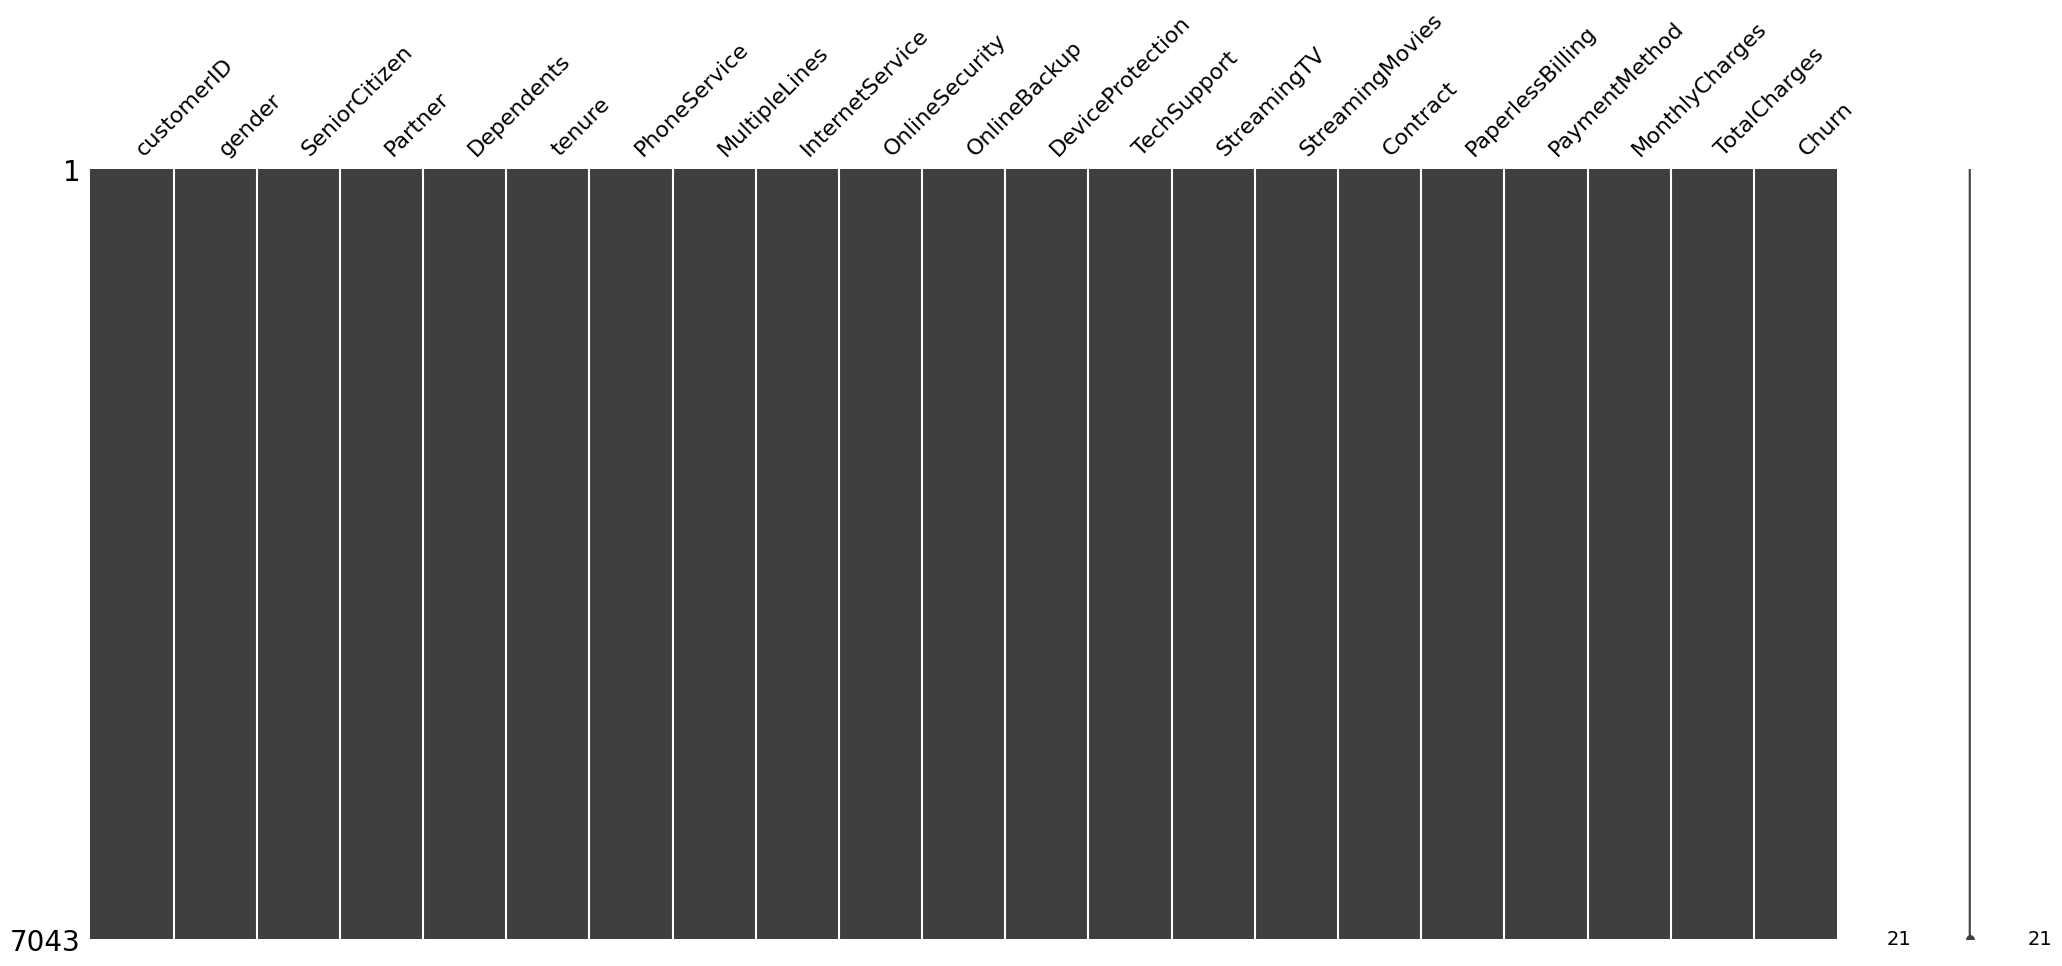

In [ ]:
# Visualize missing values as a matrix
msno.matrix(data);

**3.** **Data Manipulation**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

Feature Importance Analysis

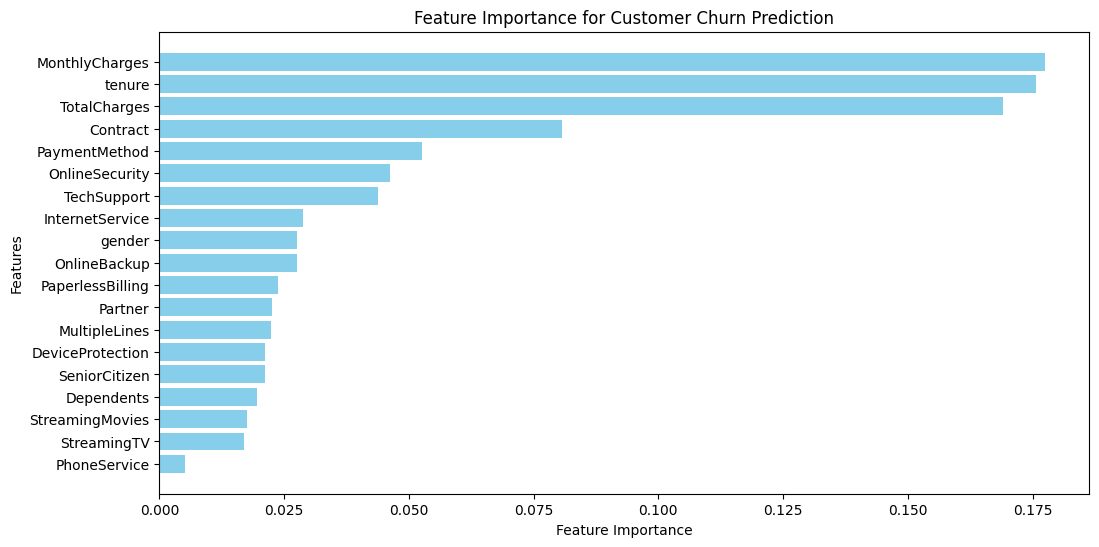


🛑 low features Effective:
            Feature  Importance
1     SeniorCitizen    0.021134
3        Dependents    0.019623
13  StreamingMovies    0.017572
12      StreamingTV    0.016878
5      PhoneService    0.005117


In [ ]:
data.drop(columns=["customerID"], inplace=True)

# LabelEncoder
categorical_columns = data.select_dtypes(include=["object"]).columns

label_encoders = {}
for col in categorical_columns:
    if col != "Churn":
        label_encoders[col] = LabelEncoder()
        data[col] = label_encoders[col].fit_transform(data[col])

data["Churn"] = data["Churn"].map({"No": 0, "Yes": 1})

# drop Features
X = data.drop(columns=["Churn"])
y = data["Churn"]

# Create a Random Forest model to determine the significance of the scale
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extract the importance of features
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# most important features
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Customer Churn Prediction")
plt.gca().invert_yaxis()
plt.show()


print("\n🛑 low features Effective:")
print(feature_importance_df.tail(5))

In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(data, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* **Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn**.

In [ ]:
data.drop(columns=["PhoneService", "StreamingTV"], inplace=True)

In [ ]:
data.head(9)

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,1,0,0,2,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,0,0,2,0,2,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,0,0,2,2,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,1,0,2,0,2,2,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,0,1,0,0,0,0,0,0,1,2,70.70,925,1
5,0,0,0,0,8,2,1,0,0,2,0,2,0,1,2,99.65,6104,1
6,1,0,0,1,22,2,1,0,2,0,0,0,0,1,1,89.10,1550,0
7,0,0,0,0,10,1,0,2,0,0,0,0,0,0,3,29.75,2609,0
8,0,0,1,0,28,2,1,0,0,2,2,2,0,1,2,104.80,2646,1


In [ ]:
data["Churn"].value_counts()

,count
Churn,
0,5174
1,1869


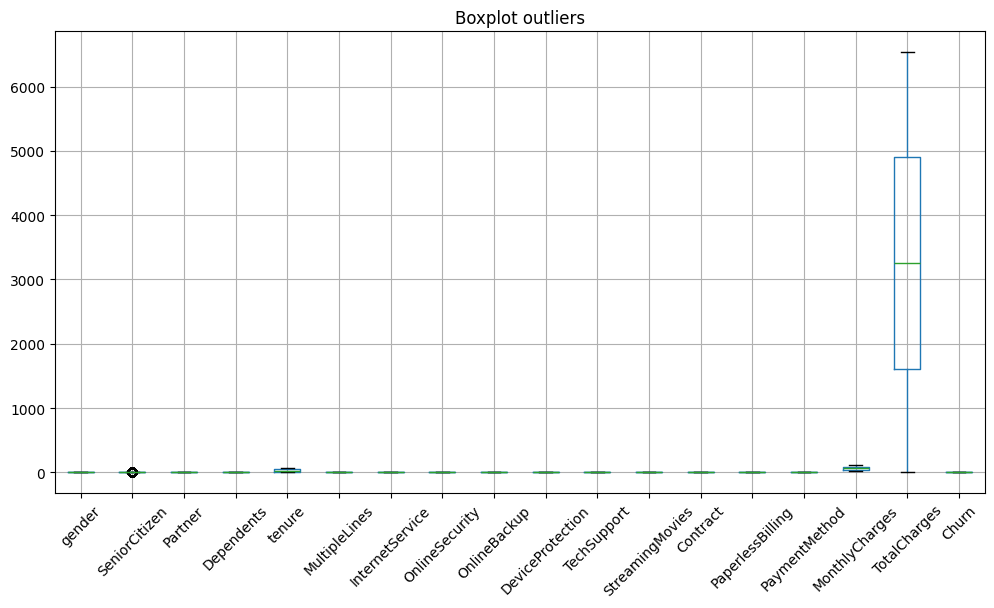

In [ ]:
# processing Outliers value
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(12, 6))
data[numerical_columns].boxplot(rot=45)
plt.title("Boxplot outliers")
plt.show()

In [ ]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(data[numerical_columns]))

outliers = (z_scores > 3)

print("\n Z-score numbers of outliers values:")
print(outliers.sum(axis=0))

df_cleaned = data[~outliers.any(axis=1)]
print("\n After dropped outliers", df_cleaned.shape[0])


 Z-score numbers of outliers values:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 After dropped outliers 7043


**5. Data Visualization**

In [ ]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=data['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=data['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [ ]:
# Customer contract distribution
'''
0. Month to Month
1. One Year
2. Two Year
'''

fig = px.histogram(data, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
processed_data = data

In [ ]:
# prompt: save data after Processing

# Save the processed DataFrame to a CSV file
df_cleaned.to_csv('/content/drive/MyDrive/Text/processed_data.csv', index=False)

print("Processed data saved to: /content/drive/MyDrive/Text/processed_data.csv")


Processed data saved to: /content/drive/MyDrive/Text/processed_data.csv


**6. Data Split**

In [ ]:
X = data.drop(columns=["Churn"])
y = data['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")

Number of training samples: 5634
Number of testing samples: 1409


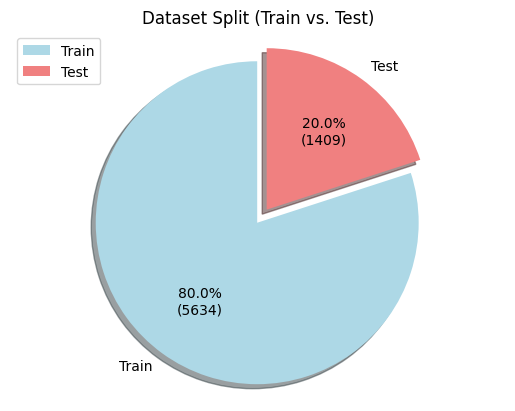

In [ ]:
labels = ['Train', 'Test']
sizes = [len(X_train), len(X_test)]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # To explode the first slice

def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct=lambda pct: func(pct, sizes), shadow=True, startangle=90)

plt.axis('equal')
plt.title('Dataset Split (Train vs. Test)')
plt.legend(loc='upper left')
plt.show()

## **Deep Learning Model using PyTorch**
* **Define PyToch Model**
* **Define Loss Function and Optimizers**
* **Run a Training Loop**
* **Evaluate the Model**
* **Make Predictions**

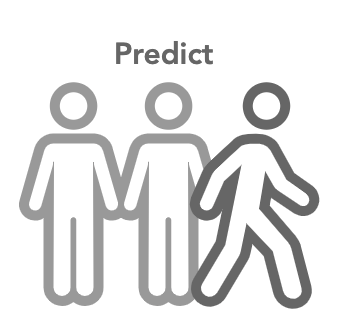

In [ ]:
# Data Split
X = data.drop(columns=["Churn"])
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")

In [ ]:
# Hyperparameters
num_epochs = 100
batch_size = 64
learning_rate = 0.005
patience = 3
lr_factor = 0.5
weight_decay  = 1e-4

**StandardScaler**

In [ ]:
import joblib

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
# Convert y_train and y_test to NumPy arrays before creating tensors
y_train = y_train.values  # Extract NumPy array from y_train Series
y_test = y_test.values    # Extract NumPy array from y_test Series


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [ ]:
# Create a DataLoader to improve data processing during training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

**Function Data after processed**

**Neural Network Architecture**

In [ ]:
'''
class ImprovedNN(nn.Module):
    def __init__(self, input_size):
        super(ImprovedNN, self).__init__()

        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(0.15)

        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.15)

        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.dropout3 = nn.Dropout(0.1)

        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)

        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)

        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)

        x = torch.sigmoid(self.fc4(x))
        return x


# Define the Model
input_dim = X_train.shape[1]
model = ImprovedNN(input_dim)

'''

In [ ]:
class ChurnModel(nn.Module):
  def __init__(self, input_dim):

    super(ChurnModel, self).__init__()

    self.layers = nn.Sequential(

        nn.Linear(input_dim, 256), # The first layer
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.2),

        nn.Linear(256, 128), # The second layer
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.2),

        nn.Linear(128, 64), # 3th layer
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(0.2),

        nn.Linear(64, 32), # 4th layer
        nn.ReLU(),

        nn.Linear(32,1), # output layer
        nn.Sigmoid()

    )

  # Define forward pass
  def forward(self,x):
    return self.layers(x)

# Define the Model
input_dim = X_train.shape[1]
model = ChurnModel(input_dim)

In [ ]:
print(model)

**Define Loss Function and Optimizers**

In [ ]:
# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # Using the Adam optimizer

# Learning rate scheduler (optional but recommended)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', patience=patience, factor=lr_factor, verbose=True
)

'''
# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', patience=patience, factor=lr_factor, verbose=True
)
'''

"\n# Define the loss function and optimizer\ncriterion = nn.BCELoss()\noptimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)\n\nscheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(\n    optimizer, mode='min', patience=patience, factor=lr_factor, verbose=True\n)\n"

**Training Loop**

In [ ]:
def train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)


    for epoch in range(num_epochs):
        model.train()  # Training Mode
        total_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            # Remove squeezing from the output
            outputs = model(inputs)
            loss = criterion(outputs, labels)  # Remove float() as it's already float32
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")

In [ ]:
# def train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs):
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     model.to(device)

#     for epoch in range(num_epochs):
#         model.train()  # Training Mode
#         running_loss = 0.0

#         for inputs, labels in train_loader:
#             inputs, labels = inputs.to(device), labels.to(device)

#             optimizer.zero_grad()
#             outputs = model(inputs).squeeze(1)

#             # Reshape labels to match outputs (remove the extra dimension)
#             loss = criterion(outputs, labels.squeeze(1).float())
#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item()

#         avg_loss = running_loss / len(train_loader)
#         print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

#         scheduler.step(avg_loss)


# print("\n✅ Finished Train!")

**Testing  Loop**

In [ ]:
def evaluate_model(model, test_loader, criterion):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    total_loss, correct, total = 0.0, 0, 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Remove squeezing from the output
            outputs = model(inputs)
            loss = criterion(outputs, labels)  # Remove float() as it's already float32
            total_loss += loss.item()

            preds = torch.round(torch.sigmoid(outputs))
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    avg_loss = total_loss / len(test_loader)
    accuracy = 100 * correct / total
    print(f"Test Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")
    return avg_loss, accuracy

In [ ]:
# def evaluate_model(model, test_loader, criterion):
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     model.to(device)
#     model.eval() # Val Mode

#     total_loss = 0.0
#     correct = 0
#     total = 0

#     with torch.no_grad():
#         for inputs, labels in test_loader:
#             inputs, labels = inputs.to(device), labels.to(device)
#             outputs = model(inputs).squeeze(1)

#             # Reshape labels to match outputs (remove the extra dimension)
#             loss = criterion(outputs, labels.squeeze(1).float())
#             total_loss += loss.item()


#             preds = torch.round(torch.sigmoid(outputs))
#             correct += (preds == labels.squeeze(1)).sum().item()  # Compare with squeezed labels
#             total += labels.size(0)

#     avg_loss = total_loss / len(test_loader)
#     accuracy = 100 * correct / total

#     print(f"Test Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")
#     return avg_loss, accuracy

**Full Training process**

In [ ]:
train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs)
evaluate_model(model, test_loader, criterion)

Epoch [1/100], Loss: 0.6736
Epoch [2/100], Loss: 0.6732
Epoch [3/100], Loss: 0.6742
Epoch [4/100], Loss: 0.6723
Epoch [5/100], Loss: 0.6755
Epoch [6/100], Loss: 0.6719
Epoch [7/100], Loss: 0.6734
Epoch [8/100], Loss: 0.6721
Epoch [9/100], Loss: 0.6744
Epoch [10/100], Loss: 0.6738
Epoch [11/100], Loss: 0.6726
Epoch [12/100], Loss: 0.6730
Epoch [13/100], Loss: 0.6716
Epoch [14/100], Loss: 0.6701
Epoch [15/100], Loss: 0.6734
Epoch [16/100], Loss: 0.6733
Epoch [17/100], Loss: 0.6738
Epoch [18/100], Loss: 0.6699
Epoch [19/100], Loss: 0.6734
Epoch [20/100], Loss: 0.6715
Epoch [21/100], Loss: 0.6722
Epoch [22/100], Loss: 0.6707
Epoch [23/100], Loss: 0.6714
Epoch [24/100], Loss: 0.6724
Epoch [25/100], Loss: 0.6720
Epoch [26/100], Loss: 0.6734
Epoch [27/100], Loss: 0.6718
Epoch [28/100], Loss: 0.6721
Epoch [29/100], Loss: 0.6723
Epoch [30/100], Loss: 0.6707
Epoch [31/100], Loss: 0.6701
Epoch [32/100], Loss: 0.6720
Epoch [33/100], Loss: 0.6699
Epoch [34/100], Loss: 0.6729
Epoch [35/100], Loss: 0

(0.6779665986696879, 80.69552874378992)

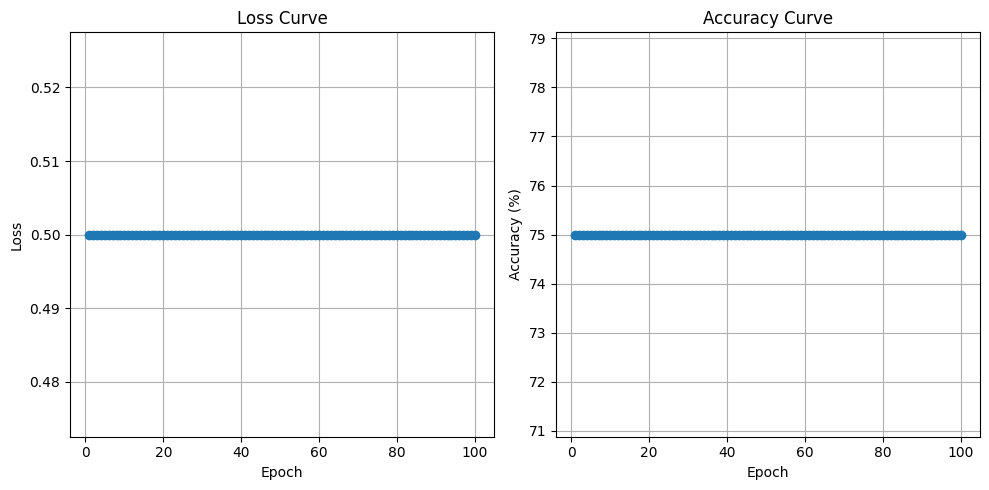

In [ ]:
epochs = range(1, num_epochs + 1)
loss_history = [0.5] * num_epochs # Replace with your loss values
accuracy_history = [75.0] * num_epochs # Replace with your accuracy values


# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_history, marker='o', linestyle='-')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Plot the accuracy curve
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_history, marker='o', linestyle='-')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)

plt.tight_layout()
plt.show()


### **Save the model**

In [ ]:
torch.save(model.state_dict(), 'churn_model.pth')

### **Predictions Function--Eva**

In [ ]:
## testing Dataset
import pandas as pd

data = {
    'gender': [0, 1],
    'SeniorCitizen': [0, 1],
    'Partner': [1, 0],
    'Dependents': [0, 1],
    'tenure': [5, 24],
    'MultipleLines': [0, 1],
    'InternetService': [2, 1],
    'OnlineSecurity': [0, 1],
    'OnlineBackup': [1, 0],
    'DeviceProtection': [0, 1],
    'TechSupport': [1, 0],
    'StreamingMovies': [1, 0],
    'Contract': [0, 2],
    'PaperlessBilling': [1, 0],
    'PaymentMethod': [0, 2],
    'MonthlyCharges': [29.85, 89.10],
    'TotalCharges': [150.65, 2150.50],
}

df = pd.DataFrame(data)
df

In [ ]:
# Predictions Function--Eva
import numpy as np
import torch
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

model = ChurnModel(17)  ## imput_dim = df.shape[1]
model.load_state_dict(torch.load('.model path/.model.pth'))
model.eval()
#----------------------------------------------------------------------

new_data = df
# Preprocess the new data (similar to how you preprocessed your training data)
# 1. Handle missing values
# 2. Feature engineering (if needed)
# 3. Feature scaling

features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'
]
X_new = new_data[features]

# Scale the new data using the same scaler you used for training
scaler = joblib.load('/content/scaler.pkl')
X_new = scaler.transform(X_new)

# Convert the new data to a PyTorch tensor
X_new_tensor = torch.tensor(X_new, dtype=torch.float32)

# Make predictions
with torch.no_grad():
  predictions = model(X_new_tensor)
  predicted_labels = (predictions > 0.5).float()  # binary classification task

predicted_labels_text = predicted_labels.numpy().astype(int)

#
predicted_labels_text = predicted_labels_text.reshape(-1)  # Flatten the array
predicted_labels_text = pd.Series(predicted_labels_text).map({0: "Stay", 1: "Will Churn"})

new_data['Churn Prediction'] = predicted_labels_text
new_data['Churn Prediction']

,Churn Prediction
0,Stay
1,Stay


##**ML Models**

In [ ]:
## ML Models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


# Function for model training and evaluation
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

# Train and evaluate each model
results = {}
for name, model in models.items():
  accuracy = train_and_evaluate_model(model, X_train, y_train, X_test, y_test)
  results[name] = accuracy
  print(f"{name}: Accuracy = {accuracy:.4f}")

# The best model
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with accuracy {results[best_model]:.4f}")

Logistic Regression: Accuracy = 0.8162
SVM: Accuracy = 0.8006
Decision Tree: Accuracy = 0.7182
Random Forest: Accuracy = 0.7921
Gradient Boosting: Accuracy = 0.8098
K-Nearest Neighbors: Accuracy = 0.7658

Best Model: Logistic Regression with accuracy 0.8162


In [ ]:
# # Save the best model
# import joblib

# joblib.dump(logistic_regression_model, "lr_model.pkl")
# print("Model saved successfully!")

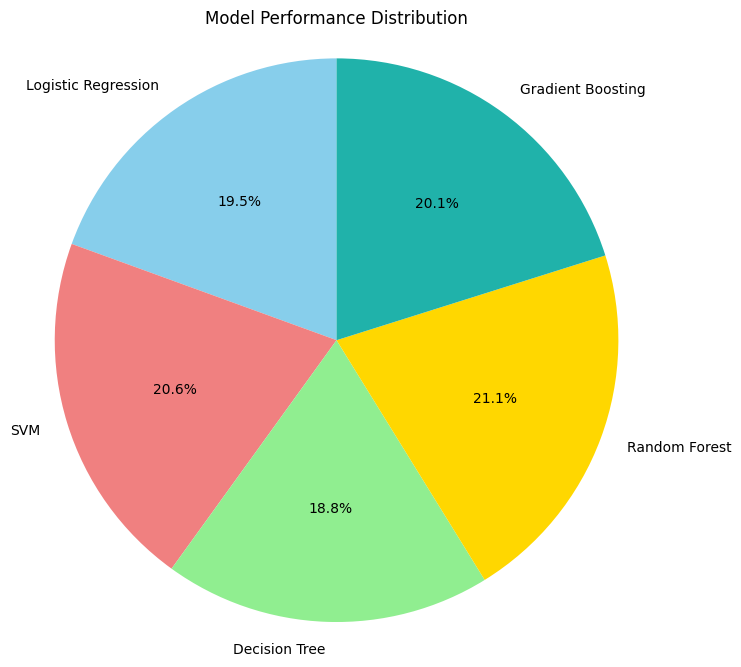

In [ ]:
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
accuracies = [0.85, 0.90, 0.82, 0.92, 0.88]  # Example accuracies


# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(accuracies, labels=models, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightseagreen'])
plt.title("Model Performance Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
